In [2]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Model
def sine(a,b,c,x):
    return a * np.sin(b * x + c)

In [4]:
# Training Parameters
n_train = 10
a_vals = np.random.uniform(0.1, 2, n_train)
b_vals = np.random.uniform(-np.pi, np.pi, n_train)
c_vals = np.random.uniform(0, 1, n_train)

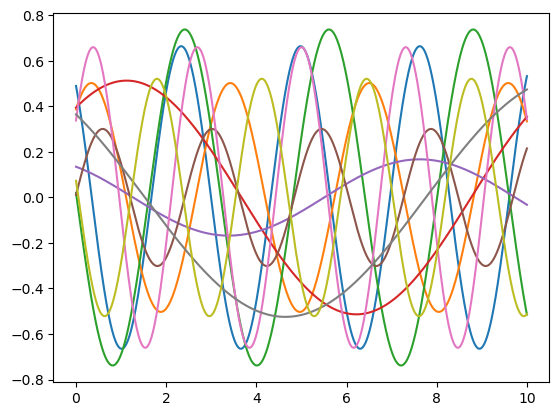

In [10]:
# Generate training data
x_data = np.arange(0,10,0.001)
y_data = [] * len(x_data)

for i in range(0,n_train-1):
    y_data = sine(a_vals[i], b_vals[i], c_vals[i], x_data) #+ np.random.normal(-a_true/10,a_true/10,len(x))
    plt.plot(x_data, y_data)

In [160]:
# Regression
def train_lr(x_data, y_data, eta):
    a = 1
    b = 1
    c = 1

    for iter in range(0, MAX_ITERS): 
        dloss_da = 0
        dloss_db = 0
        dloss_dc = 0
        losses = []
        for i in range(0, len(x_data)): 
            x = x_data[i]
            ytrue = y_data[i]
            ypred = sine(a,b,c,x)

            dmodel_da = np.sin(b*x+x)
            dmodel_db = -x*a*np.cos(b*x+c)
            dmodel_dc = -a*np.cos(b*x+c)
            
            #loss = (ypred - ytrue)**2  #VERY BAD
            #dloss_dypred = 2*(ypred - ytrue)
            #loss = np.exp(-ytrue*ypred)    # VERY BAD
            #dloss_dypred = -ytrue*np.exp(-ytrue*ypred)
            loss = np.log(np.cosh(ypred - ytrue))
            dloss_dypred = np.sinh(ypred - ytrue) / np.cosh(ypred - ytrue)
            #loss = (ypred - ytrue)**2 / ypred**2   # VERY VERY BAD
            #dloss_dypred = 2*(ypred - ytrue) / ypred**2 + (ypred - ytrue)**2 * (-2) / ypred**3

            dloss_da = dloss_dypred * dmodel_da
            dloss_db = dloss_dypred * dmodel_db
            dloss_dc = dloss_dypred * dmodel_dc
            losses.append(loss)

        if np.mean(losses) < 0.0001:
            print('Converged after '+str(iter+1)+' iterations.')
            break

        a = a - eta*dloss_da
        b = b - eta*dloss_db
        c = c - eta*dloss_dc
        print('a: ',a,'\nb: ',b,'\nc: ',c)

    return (a, b, c)

In [165]:
# Set hyperparameters
eta = 0.05
MAX_ITERS = 200

In [166]:
# Run model
pred_a, pred_b, pred_c = train_lr(x_data, y_data, eta)
pred_data = sine(pred_a, pred_b, pred_c, x_data)
acc = np.mean(np.abs(y_data - pred_data)/y_data)
print('final a: ',pred_a,'\nfinal b: ',pred_b,'\nfinal c: ',pred_c)
print('Accuracy: ',acc)

a:  0.9543952927470563 
b:  1.0017126194008021 
c:  1.000171279067987
a:  0.9084461835764528 
b:  1.0115988335963952 
c:  1.0011599993595754
a:  0.8607759562239065 
b:  1.0662214212229963 
c:  1.0066228044027399
a:  0.8122075487308912 
b:  1.334194800701182 
c:  1.0334228223523534
a:  0.8609768035978959 
b:  1.2389077573777274 
c:  1.0238931650542782
a:  0.8802490299207143 
b:  1.5244911004140769 
c:  1.0524543554769554
a:  0.8747778151860236 
b:  1.158296253799677 
c:  1.0158312085008179
a:  0.8548316529962559 
b:  1.595425656043853 
c:  1.059548520456431
a:  0.8183121596940581 
b:  1.4828564173681433 
c:  1.0482904707838927
a:  0.833405865388791 
b:  1.0794633318905849 
c:  1.0079471279018486
a:  0.7868301436198488 
b:  1.3800683470471145 
c:  1.0380106357682881
a:  0.8354399282657146 
b:  1.1266048633782566 
c:  1.0126617525130768
a:  0.8022001728229559 
b:  1.5269838679786234 
c:  1.0527036571635784
a:  0.7954920220936234 
b:  1.1989626698175944 
c:  1.01989825680744
a:  0.79530598

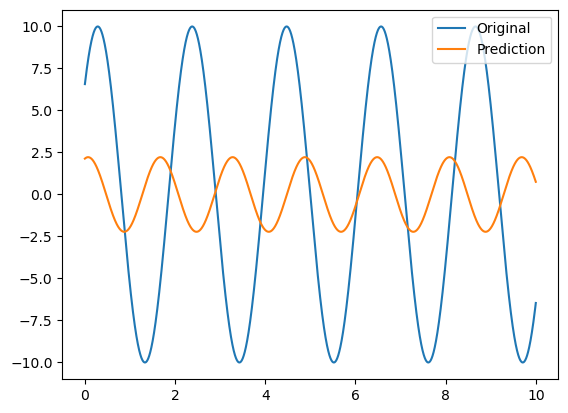

In [162]:
y_pred_data = sine(pred_a, pred_b, pred_c, x_data)
plt.plot(x_data, y_data, label='Original')
plt.plot(x_data, y_pred_data, label='Prediction')
plt.legend()